<a href="https://colab.research.google.com/github/subin1005/project/blob/main/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%99%9C%EC%9A%A9_%EA%B3%B5%EB%AA%A8%EC%A0%84(2023)_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 공공데이터 활용 공모전 (분석과제 4)

### 1. 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_percentage_error
import torch, random, os

- 시드 고정

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(42)

### 2. 데이터 불러오기

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 전력데이터
# power_1 : 2012년 6월 1일 - 2022년 4월 7일
# power_2 : 2022년 4월 1일 - 2023년 4월 30일
power_1 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/전력데이터/[2012-2022] 한국전력거래소_5분단위 전력수급현황_20220407.csv', encoding = 'cp949')
power_2 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/전력데이터/[2022-2023]한국전력거래소_5분단위 전력수급현황_20230430.csv', encoding = 'cp949') # 2022 4월 ~ 2023 4월

In [ ]:
# 태양광, 풍력 발전량 데이터
# energy1 : 2017년 1월 1일 - 2023년 2월 28일
# enregy2 : 2023년 3월 1일 - 2023년 5월 31일
energy1 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/에너지/한국전력거래소_지역별 시간별 태양광 발전량_20230228.csv', encoding = 'cp949')
energy2 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/에너지/한국전력거래소_지역별 시간별 태양광 발전량_20230531.csv', encoding = 'cp949')

In [ ]:
# 2020 날씨데이터
Gangwon_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/강원도_2020.csv', encoding = 'cp949')
Gyeonggi_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/경기도_2020.csv', encoding = 'cp949')
Gyeongsangnam_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/경상남도_2020.csv', encoding = 'cp949')
Gyeongsangbuk_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/경상북도_2020.csv', encoding = 'cp949')
Gwangju_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/광주_2020.csv', encoding = 'cp949')
Daegu_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/대구_2020.csv', encoding = 'cp949')
Daejeon_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/대전_2020.csv', encoding = 'cp949')
Busan_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/부산_2020.csv', encoding = 'cp949')
Seoul_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/서울_2020.csv', encoding = 'cp949')
Sejong_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/세종_2020.csv', encoding = 'cp949')
Ulsan_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/울산_2020.csv', encoding = 'cp949')
Incheon_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/인천_2020.csv', encoding = 'cp949')
Jeollanam_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/전라남도_2020.csv', encoding = 'cp949')
Jeollabuk_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/전라북도_2020.csv', encoding = 'cp949')
Jeju_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/제주도_2020.csv', encoding = 'cp949')
Chungcheongnam_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/충청남도_2020.csv', encoding = 'cp949')
Chungcheongbuk_2020 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/충청북도_2020.csv', encoding = 'cp949')

In [ ]:
# 2021 날씨데이터
Gangwon_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/강원도_2021.csv', encoding = 'cp949')
Gyeonggi_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/경기도_2021.csv', encoding = 'cp949')
Gyeongsangnam_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/경상남도_2021.csv', encoding = 'cp949')
Gyeongsangbuk_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/경상북도_2021.csv', encoding = 'cp949')
Gwangju_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/광주_2021.csv', encoding = 'cp949')
Daegu_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/대구_2021.csv', encoding = 'cp949')
Daejeon_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/대전_2021.csv', encoding = 'cp949')
Busan_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/부산_2021.csv', encoding = 'cp949')
Seoul_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/서울_2021.csv', encoding = 'cp949')
Sejong_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/세종_2021.csv', encoding = 'cp949')
Ulsan_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/울산_2021.csv', encoding = 'cp949')
Incheon_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/인천_2021.csv', encoding = 'cp949')
Jeollanam_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/전라남도_2021.csv', encoding = 'cp949')
Jeollabuk_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/전라북도_2021.csv', encoding = 'cp949')
Jeju_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/제주도_2021.csv', encoding = 'cp949')
Chungcheongnam_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/충청남도_2021.csv', encoding = 'cp949')
Chungcheongbuk_2021 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/충청북도_2021.csv', encoding = 'cp949')

In [ ]:
# 2022 날씨데이터
Gangwon_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/강원도_2022.csv', encoding = 'cp949')
Gyeonggi_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/경기도_2022.csv', encoding = 'cp949')
Gyeongsangnam_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/경상남도_2022.csv', encoding = 'cp949')
Gyeongsangbuk_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/경상북도_2022.csv', encoding = 'cp949')
Gwangju_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/광주_2022.csv', encoding = 'cp949')
Daegu_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/대구_2022.csv', encoding = 'cp949')
Daejeon_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/대전_2022.csv', encoding = 'cp949')
Busan_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/부산_2022.csv', encoding = 'cp949')
Seoul_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/서울_2022.csv', encoding = 'cp949')
Sejong_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/세종_2022.csv', encoding = 'cp949')
Ulsan_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/울산_2022.csv', encoding = 'cp949')
Incheon_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/인천_2022.csv', encoding = 'cp949')
Jeollanam_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/전라남도_2022.csv', encoding = 'cp949')
Jeollabuk_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/전라북도_2022.csv', encoding = 'cp949')
Jeju_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/제주도_2022.csv', encoding = 'cp949')
Chungcheongnam_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/충청남도_2022.csv', encoding = 'cp949')
Chungcheongbuk_2022 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/충청북도_2022.csv', encoding = 'cp949')

In [ ]:
 # 2023 날씨데이터
Gangwon_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/강원도_2023.csv', encoding = 'cp949')
Gyeonggi_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/경기도_2023.csv', encoding = 'cp949')
Gyeongsangnam_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/경상남도_2023.csv', encoding = 'cp949')
Gyeongsangbuk_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/경상북도_2023.csv', encoding = 'cp949')
Gwangju_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/광주_2023.csv', encoding = 'cp949')
Daegu_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/대구_2023.csv', encoding = 'cp949')
Daejeon_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/대전_2023.csv', encoding = 'cp949')
Busan_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/부산_2023.csv', encoding = 'cp949')
Seoul_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/서울_2023.csv', encoding = 'cp949')
Sejong_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/세종_2023.csv', encoding = 'cp949')
Ulsan_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/울산_2023.csv', encoding = 'cp949')
Incheon_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/인천_2023.csv', encoding = 'cp949')
Jeollanam_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/전라남도_2023.csv', encoding = 'cp949')
Jeollabuk_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/전라북도_2023.csv', encoding = 'cp949')
Jeju_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/제주도_2023.csv', encoding = 'cp949')
Chungcheongnam_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/충청남도_2023.csv', encoding = 'cp949')
Chungcheongbuk_2023 = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/충청북도_2023.csv', encoding = 'cp949')

In [ ]:
# test 날씨데이터
Gangwon_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/강원도_test1.csv', encoding = 'cp949')
Gyeonggi_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/경기도_test1.csv', encoding = 'cp949')
Gyeongsangnam_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/경상남도_test1.csv', encoding = 'cp949')
Gyeongsangbuk_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/경상북도_test1.csv', encoding = 'cp949')
Gwangju_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/광주_test1.csv', encoding = 'cp949')
Daegu_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/대구_test1.csv', encoding = 'cp949')
Daejeon_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/대전_test1.csv', encoding = 'cp949')
Busan_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/부산_test1.csv', encoding = 'cp949')
Seoul_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/서울_test1.csv', encoding = 'cp949')
Sejong_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/세종_test1.csv', encoding = 'cp949')
Ulsan_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/울산_test1.csv', encoding = 'cp949')
Incheon_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/인천_test1.csv', encoding = 'cp949')
Jeollanam_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/전라남도_test1.csv', encoding = 'cp949')
Jeollabuk_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/전라북도_test1.csv', encoding = 'cp949')
Jeju_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/제주도_test1.csv', encoding = 'cp949')
Chungcheongnam_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/충청남도_test1.csv', encoding = 'cp949')
Chungcheongbuk_test = pd.read_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/날씨데이터/충청북도_test1.csv', encoding = 'cp949')

### 3. 데이터 탐색

In [ ]:
# 전력 데이터 결측치 없음
power_1.isnull().sum()

기준일시          0
공급능력(MW)      0
현재수요(MW)      0
최대예측수요(MW)    0
공급예비력(MW)     0
공급예비율(퍼센트)    0
운영예비력(MW)     0
운영예비율(퍼센트)    0
dtype: int64

In [ ]:
power_2.isnull().sum()

기준일시          0
공급능력(MW)      0
현재수요(MW)      0
최대예측수요(MW)    0
공급예비력(MW)     0
공급예비율(퍼센트)    0
운영예비력(MW)     0
운영예비율(퍼센트)    0
dtype: int64

In [ ]:
energy1.isnull().sum()

거래일자                   0
거래시간                   0
지역                     0
 태양광 발전량(MWh)          0
 풍력 발전량(MWh)      324000
dtype: int64

In [ ]:
energy2.isnull().sum()

거래일자                0
거래시간                0
지역                  0
  태양광 발전량(MWh)      0
  풍력 발전량(MWh)       0
dtype: int64

energy1의 풍력 발전량에 324,000개의 결측치 존재

### 4. 데이터 전처리

#### (1) 지역별 날씨데이터

- 시도의 일시로 그룹화

In [ ]:
Gangwondo_2020 = Gangwon_2020.drop('지점명', axis = 1).groupby('일시').mean()
Gyeonggido_2020 = Gyeonggi_2020.drop('지점명', axis = 1).groupby('일시').mean()
Gyeongsangnamdo_2020 = Gyeongsangnam_2020.drop('지점명', axis = 1).groupby('일시').mean()
Gyeongsangbukdo_2020 = Gyeongsangbuk_2020.drop('지점명', axis = 1).groupby('일시').mean()
Gwangjusi_2020 = Gwangju_2020.drop('지점명', axis = 1).groupby('일시').mean()
Daegusi_2020 = Daegu_2020.drop('지점명', axis = 1).groupby('일시').mean()
Daejeonsi_2020 = Daejeon_2020.drop('지점명', axis = 1).groupby('일시').mean()
Busansi_2020 = Busan_2020.drop('지점명', axis = 1).groupby('일시').mean()
Seoulsi_2020 = Seoul_2020.drop('지점명', axis = 1).groupby('일시').mean()
Sejongsi_2020 = Sejong_2020.drop('지점명', axis = 1).groupby('일시').mean()
Ulsansi_2020 = Ulsan_2020.drop('지점명', axis = 1).groupby('일시').mean()
Incheonsi_2020 = Incheon_2020.drop('지점명', axis = 1).groupby('일시').mean()
Jeollanamdo_2020 = Jeollanam_2020.drop('지점명', axis = 1).groupby('일시').mean()
Jeollabukdo_2020 = Jeollabuk_2020.drop('지점명', axis = 1).groupby('일시').mean()
Jejudo_2020 = Jeju_2020.drop('지점명', axis = 1).groupby('일시').mean()
Chungcheongnamdo_2020 = Chungcheongnam_2020.drop('지점명', axis = 1).groupby('일시').mean()
Chungcheongbukdo_2020 = Chungcheongbuk_2020.drop('지점명', axis = 1).groupby('일시').mean()

In [ ]:
Gangwondo_2021 = Gangwon_2021.drop('지점명', axis = 1).groupby('일시').mean()
Gyeonggido_2021 = Gyeonggi_2021.drop('지점명', axis = 1).groupby('일시').mean()
Gyeongsangnamdo_2021 = Gyeongsangnam_2021.drop('지점명', axis = 1).groupby('일시').mean()
Gyeongsangbukdo_2021 = Gyeongsangbuk_2021.drop('지점명', axis = 1).groupby('일시').mean()
Gwangjusi_2021 = Gwangju_2021.drop('지점명', axis = 1).groupby('일시').mean()
Daegusi_2021 = Daegu_2021.drop('지점명', axis = 1).groupby('일시').mean()
Daejeonsi_2021 = Daejeon_2021.drop('지점명', axis = 1).groupby('일시').mean()
Busansi_2021 = Busan_2021.drop('지점명', axis = 1).groupby('일시').mean()
Seoulsi_2021 = Seoul_2021.drop('지점명', axis = 1).groupby('일시').mean()
Sejongsi_2021 = Sejong_2021.drop('지점명', axis = 1).groupby('일시').mean()
Ulsansi_2021 = Ulsan_2021.drop('지점명', axis = 1).groupby('일시').mean()
Incheonsi_2021 = Incheon_2021.drop('지점명', axis = 1).groupby('일시').mean()
Jeollanamdo_2021 = Jeollanam_2021.drop('지점명', axis = 1).groupby('일시').mean()
Jeollabukdo_2021 = Jeollabuk_2021.drop('지점명', axis = 1).groupby('일시').mean()
Jejudo_2021 = Jeju_2021.drop('지점명', axis = 1).groupby('일시').mean()
Chungcheongnamdo_2021 = Chungcheongnam_2021.drop('지점명', axis = 1).groupby('일시').mean()
Chungcheongbukdo_2021 = Chungcheongbuk_2021.drop('지점명', axis = 1).groupby('일시').mean()

In [ ]:
Gangwondo_2022 = Gangwon_2022.drop('지점명', axis = 1).groupby('일시').mean()
Gyeonggido_2022 = Gyeonggi_2022.drop('지점명', axis = 1).groupby('일시').mean()
Gyeongsangnamdo_2022 = Gyeongsangnam_2022.drop('지점명', axis = 1).groupby('일시').mean()
Gyeongsangbukdo_2022 = Gyeongsangbuk_2022.drop('지점명', axis = 1).groupby('일시').mean()
Gwangjusi_2022 = Gwangju_2022.drop('지점명', axis = 1).groupby('일시').mean()
Daegusi_2022 = Daegu_2022.drop('지점명', axis = 1).groupby('일시').mean()
Daejeonsi_2022 = Daejeon_2022.drop('지점명', axis = 1).groupby('일시').mean()
Busansi_2022 = Busan_2022.drop('지점명', axis = 1).groupby('일시').mean()
Seoulsi_2022 = Seoul_2022.drop('지점명', axis = 1).groupby('일시').mean()
Sejongsi_2022 = Sejong_2022.drop('지점명', axis = 1).groupby('일시').mean()
Ulsansi_2022 = Ulsan_2022.drop('지점명', axis = 1).groupby('일시').mean()
Incheonsi_2022 = Incheon_2022.drop('지점명', axis = 1).groupby('일시').mean()
Jeollanamdo_2022 = Jeollanam_2022.drop('지점명', axis = 1).groupby('일시').mean()
Jeollabukdo_2022 = Jeollabuk_2022.drop('지점명', axis = 1).groupby('일시').mean()
Jejudo_2022 = Jeju_2022.drop('지점명', axis = 1).groupby('일시').mean()
Chungcheongnamdo_2022 = Chungcheongnam_2022.drop('지점명', axis = 1).groupby('일시').mean()
Chungcheongbukdo_2022 = Chungcheongbuk_2022.drop('지점명', axis = 1).groupby('일시').mean()

In [ ]:
Gangwondo_2023 = Gangwon_2023.drop('지점명', axis = 1).groupby('일시').mean()
Gyeonggido_2023 = Gyeonggi_2023.drop('지점명', axis = 1).groupby('일시').mean()
Gyeongsangnamdo_2023 = Gyeongsangnam_2023.drop('지점명', axis = 1).groupby('일시').mean()
Gyeongsangbukdo_2023 = Gyeongsangbuk_2023.drop('지점명', axis = 1).groupby('일시').mean()
Gwangjusi_2023 = Gwangju_2023.drop('지점명', axis = 1).groupby('일시').mean()
Daegusi_2023 = Daegu_2023.drop('지점명', axis = 1).groupby('일시').mean()
Daejeonsi_2023 = Daejeon_2023.drop('지점명', axis = 1).groupby('일시').mean()
Busansi_2023 = Busan_2023.drop('지점명', axis = 1).groupby('일시').mean()
Seoulsi_2023 = Seoul_2023.drop('지점명', axis = 1).groupby('일시').mean()
Sejongsi_2023 = Sejong_2023.drop('지점명', axis = 1).groupby('일시').mean()
Ulsansi_2023 = Ulsan_2023.drop('지점명', axis = 1).groupby('일시').mean()
Incheonsi_2023 = Incheon_2023.drop('지점명', axis = 1).groupby('일시').mean()
Jeollanamdo_2023 = Jeollanam_2023.drop('지점명', axis = 1).groupby('일시').mean()
Jeollabukdo_2023 = Jeollabuk_2023.drop('지점명', axis = 1).groupby('일시').mean()
Jejudo_2023 = Jeju_2023.drop('지점명', axis = 1).groupby('일시').mean()
Chungcheongnamdo_2023 = Chungcheongnam_2023.drop('지점명', axis = 1).groupby('일시').mean()
Chungcheongbukdo_2023 = Chungcheongbuk_2023.drop('지점명', axis = 1).groupby('일시').mean()

In [ ]:
Gangwondo_test = Gangwon_test.drop('지점명', axis = 1).groupby('일시').mean()
Gyeonggido_test = Gyeonggi_test.drop('지점명', axis = 1).groupby('일시').mean()
Gyeongsangnamdo_test = Gyeongsangnam_test.drop('지점명', axis = 1).groupby('일시').mean()
Gyeongsangbukdo_test = Gyeongsangbuk_test.drop('지점명', axis = 1).groupby('일시').mean()
Gwangjusi_test = Gwangju_test.drop('지점명', axis = 1).groupby('일시').mean()
Daegusi_test = Daegu_test.drop('지점명', axis = 1).groupby('일시').mean()
Daejeonsi_test = Daejeon_test.drop('지점명', axis = 1).groupby('일시').mean()
Busansi_test = Busan_test.drop('지점명', axis = 1).groupby('일시').mean()
Seoulsi_test = Seoul_test.drop('지점명', axis = 1).groupby('일시').mean()
Sejongsi_test = Sejong_test.drop('지점명', axis = 1).groupby('일시').mean()
Ulsansi_test = Ulsan_test.drop('지점명', axis = 1).groupby('일시').mean()
Incheonsi_test = Incheon_test.drop('지점명', axis = 1).groupby('일시').mean()
Jeollanamdo_test = Jeollanam_test.drop('지점명', axis = 1).groupby('일시').mean()
Jeollabukdo_test = Jeollabuk_test.drop('지점명', axis = 1).groupby('일시').mean()
Jejudo_test = Jeju_test.drop('지점명', axis = 1).groupby('일시').mean()
Chungcheongnamdo_test = Chungcheongnam_test.drop('지점명', axis = 1).groupby('일시').mean()
Chungcheongbukdo_test = Chungcheongbuk_test.drop('지점명', axis = 1).groupby('일시').mean()

- 강수량의 결측을 0으로 대치

In [ ]:
# 모든 강수량 결측치 0으로 대치 (강수량 결측을 0으로 추정)
Gangwondo_2020['강수량(mm)'] = Gangwondo_2020['강수량(mm)'].fillna(0)
Gyeonggido_2020['강수량(mm)'] = Gyeonggido_2020['강수량(mm)'].fillna(0)
Gyeongsangnamdo_2020['강수량(mm)'] = Gyeongsangnamdo_2020['강수량(mm)'].fillna(0)
Gyeongsangbukdo_2020['강수량(mm)'] = Gyeongsangbukdo_2020['강수량(mm)'].fillna(0)
Gwangjusi_2020['강수량(mm)'] = Gwangjusi_2020['강수량(mm)'].fillna(0)
Daegusi_2020['강수량(mm)'] = Daegusi_2020['강수량(mm)'].fillna(0)
Daejeonsi_2020['강수량(mm)'] = Daejeonsi_2020['강수량(mm)'].fillna(0)
Busansi_2020['강수량(mm)'] = Busansi_2020['강수량(mm)'].fillna(0)
Seoulsi_2020['강수량(mm)'] = Seoulsi_2020['강수량(mm)'].fillna(0)
Sejongsi_2020['강수량(mm)'] = Sejongsi_2020['강수량(mm)'].fillna(0)
Ulsansi_2020['강수량(mm)'] = Ulsansi_2020['강수량(mm)'].fillna(0)
Incheonsi_2020['강수량(mm)'] = Incheonsi_2020['강수량(mm)'].fillna(0)
Jeollanamdo_2020['강수량(mm)'] = Jeollanamdo_2020['강수량(mm)'].fillna(0)
Jeollabukdo_2020['강수량(mm)'] = Jeollabukdo_2020['강수량(mm)'].fillna(0)
Jejudo_2020['강수량(mm)'] = Jejudo_2020['강수량(mm)'].fillna(0)
Chungcheongnamdo_2020['강수량(mm)'] = Chungcheongnamdo_2020['강수량(mm)'].fillna(0)
Chungcheongbukdo_2020['강수량(mm)'] = Chungcheongbukdo_2020['강수량(mm)'].fillna(0)

In [ ]:
# 모든 강수량 결측치 0으로 대치 (강수량 결측을 0으로 추정)
Gangwondo_2021['강수량(mm)'] = Gangwondo_2021['강수량(mm)'].fillna(0)
Gyeonggido_2021['강수량(mm)'] = Gyeonggido_2021['강수량(mm)'].fillna(0)
Gyeongsangnamdo_2021['강수량(mm)'] = Gyeongsangnamdo_2021['강수량(mm)'].fillna(0)
Gyeongsangbukdo_2021['강수량(mm)'] = Gyeongsangbukdo_2021['강수량(mm)'].fillna(0)
Gwangjusi_2021['강수량(mm)'] = Gwangjusi_2021['강수량(mm)'].fillna(0)
Daegusi_2021['강수량(mm)'] = Daegusi_2021['강수량(mm)'].fillna(0)
Daejeonsi_2021['강수량(mm)'] = Daejeonsi_2021['강수량(mm)'].fillna(0)
Busansi_2021['강수량(mm)'] = Busansi_2021['강수량(mm)'].fillna(0)
Seoulsi_2021['강수량(mm)'] = Seoulsi_2021['강수량(mm)'].fillna(0)
Sejongsi_2021['강수량(mm)'] = Sejongsi_2021['강수량(mm)'].fillna(0)
Ulsansi_2021['강수량(mm)'] = Ulsansi_2021['강수량(mm)'].fillna(0)
Incheonsi_2021['강수량(mm)'] = Incheonsi_2021['강수량(mm)'].fillna(0)
Jeollanamdo_2021['강수량(mm)'] = Jeollanamdo_2021['강수량(mm)'].fillna(0)
Jeollabukdo_2021['강수량(mm)'] = Jeollabukdo_2021['강수량(mm)'].fillna(0)
Jejudo_2021['강수량(mm)'] = Jejudo_2021['강수량(mm)'].fillna(0)
Chungcheongnamdo_2021['강수량(mm)'] = Chungcheongnamdo_2021['강수량(mm)'].fillna(0)
Chungcheongbukdo_2021['강수량(mm)'] = Chungcheongbukdo_2021['강수량(mm)'].fillna(0)

In [ ]:
# 모든 강수량 결측치 0으로 대치 (강수량 결측을 0으로 추정)
Gangwondo_2022['강수량(mm)'] = Gangwondo_2022['강수량(mm)'].fillna(0)
Gyeonggido_2022['강수량(mm)'] = Gyeonggido_2022['강수량(mm)'].fillna(0)
Gyeongsangnamdo_2022['강수량(mm)'] = Gyeongsangnamdo_2022['강수량(mm)'].fillna(0)
Gyeongsangbukdo_2022['강수량(mm)'] = Gyeongsangbukdo_2022['강수량(mm)'].fillna(0)
Gwangjusi_2022['강수량(mm)'] = Gwangjusi_2022['강수량(mm)'].fillna(0)
Daegusi_2022['강수량(mm)'] = Daegusi_2022['강수량(mm)'].fillna(0)
Daejeonsi_2022['강수량(mm)'] = Daejeonsi_2022['강수량(mm)'].fillna(0)
Busansi_2022['강수량(mm)'] = Busansi_2022['강수량(mm)'].fillna(0)
Seoulsi_2022['강수량(mm)'] = Seoulsi_2022['강수량(mm)'].fillna(0)
Sejongsi_2022['강수량(mm)'] = Sejongsi_2022['강수량(mm)'].fillna(0)
Ulsansi_2022['강수량(mm)'] = Ulsansi_2022['강수량(mm)'].fillna(0)
Incheonsi_2022['강수량(mm)'] = Incheonsi_2022['강수량(mm)'].fillna(0)
Jeollanamdo_2022['강수량(mm)'] = Jeollanamdo_2022['강수량(mm)'].fillna(0)
Jeollabukdo_2022['강수량(mm)'] = Jeollabukdo_2022['강수량(mm)'].fillna(0)
Jejudo_2022['강수량(mm)'] = Jejudo_2022['강수량(mm)'].fillna(0)
Chungcheongnamdo_2022['강수량(mm)'] = Chungcheongnamdo_2022['강수량(mm)'].fillna(0)
Chungcheongbukdo_2022['강수량(mm)'] = Chungcheongbukdo_2022['강수량(mm)'].fillna(0)

In [ ]:
# 모든 강수량 결측치 0으로 대치 (강수량 결측을 0으로 추정)
Gangwondo_2023['강수량(mm)'] = Gangwondo_2023['강수량(mm)'].fillna(0)
Gyeonggido_2023['강수량(mm)'] = Gyeonggido_2023['강수량(mm)'].fillna(0)
Gyeongsangnamdo_2023['강수량(mm)'] = Gyeongsangnamdo_2023['강수량(mm)'].fillna(0)
Gyeongsangbukdo_2023['강수량(mm)'] = Gyeongsangbukdo_2023['강수량(mm)'].fillna(0)
Gwangjusi_2023['강수량(mm)'] = Gwangjusi_2023['강수량(mm)'].fillna(0)
Daegusi_2023['강수량(mm)'] = Daegusi_2023['강수량(mm)'].fillna(0)
Daejeonsi_2023['강수량(mm)'] = Daejeonsi_2023['강수량(mm)'].fillna(0)
Busansi_2023['강수량(mm)'] = Busansi_2023['강수량(mm)'].fillna(0)
Seoulsi_2023['강수량(mm)'] = Seoulsi_2023['강수량(mm)'].fillna(0)
Sejongsi_2023['강수량(mm)'] = Sejongsi_2023['강수량(mm)'].fillna(0)
Ulsansi_2023['강수량(mm)'] = Ulsansi_2023['강수량(mm)'].fillna(0)
Incheonsi_2023['강수량(mm)'] = Incheonsi_2023['강수량(mm)'].fillna(0)
Jeollanamdo_2023['강수량(mm)'] = Jeollanamdo_2023['강수량(mm)'].fillna(0)
Jeollabukdo_2023['강수량(mm)'] = Jeollabukdo_2023['강수량(mm)'].fillna(0)
Jejudo_2023['강수량(mm)'] = Jejudo_2023['강수량(mm)'].fillna(0)
Chungcheongnamdo_2023['강수량(mm)'] = Chungcheongnamdo_2023['강수량(mm)'].fillna(0)
Chungcheongbukdo_2023['강수량(mm)'] = Chungcheongbukdo_2023['강수량(mm)'].fillna(0)

In [ ]:
# 모든 강수량 결측치 0으로 대치 (강수량 결측을 0으로 추정)
Gangwondo_test['강수량(mm)'] = Gangwondo_test['강수량(mm)'].fillna(0)
Gyeonggido_test['강수량(mm)'] = Gyeonggido_test['강수량(mm)'].fillna(0)
Gyeongsangnamdo_test['강수량(mm)'] = Gyeongsangnamdo_test['강수량(mm)'].fillna(0)
Gyeongsangbukdo_test['강수량(mm)'] = Gyeongsangbukdo_test['강수량(mm)'].fillna(0)
Gwangjusi_test['강수량(mm)'] = Gwangjusi_test['강수량(mm)'].fillna(0)
Daegusi_test['강수량(mm)'] = Daegusi_test['강수량(mm)'].fillna(0)
Daejeonsi_test['강수량(mm)'] = Daejeonsi_test['강수량(mm)'].fillna(0)
Busansi_test['강수량(mm)'] = Busansi_test['강수량(mm)'].fillna(0)
Seoulsi_test['강수량(mm)'] = Seoulsi_test['강수량(mm)'].fillna(0)
Sejongsi_test['강수량(mm)'] = Sejongsi_test['강수량(mm)'].fillna(0)
Ulsansi_test['강수량(mm)'] = Ulsansi_test['강수량(mm)'].fillna(0)
Incheonsi_test['강수량(mm)'] = Incheonsi_test['강수량(mm)'].fillna(0)
Jeollanamdo_test['강수량(mm)'] = Jeollanamdo_test['강수량(mm)'].fillna(0)
Jeollabukdo_test['강수량(mm)'] = Jeollabukdo_test['강수량(mm)'].fillna(0)
Jejudo_test['강수량(mm)'] = Jejudo_test['강수량(mm)'].fillna(0)
Chungcheongnamdo_test['강수량(mm)'] = Chungcheongnamdo_test['강수량(mm)'].fillna(0)
Chungcheongbukdo_test['강수량(mm)'] = Chungcheongbukdo_test['강수량(mm)'].fillna(0)

- 그 외 결측을 평균값으로 대치 (강수량을 제외한 모든 변수는 결측량이 적기 때문)

In [ ]:
Gangwondo_2020 = Gangwondo_2020.fillna(Gangwondo_2020.mean())
Gyeonggido_2020 = Gyeonggido_2020.fillna(Gyeonggido_2020.mean())
Gyeongsangnamdo_2020 = Gyeongsangnamdo_2020.fillna(Gyeongsangnamdo_2020.mean())
Gyeongsangbukdo_2020 = Gyeongsangbukdo_2020.fillna(Gyeongsangbukdo_2020.mean())
Gwangjusi_2020 = Gwangjusi_2020.fillna(Gwangjusi_2020.mean())
Daegusi_2020 = Daegusi_2020.fillna(Daegusi_2020.mean())
Daejeonsi_2020 = Daejeonsi_2020.fillna(Daejeonsi_2020.mean())
Busansi_2020 = Busansi_2020.fillna(Busansi_2020.mean())
Seoulsi_2020 = Seoulsi_2020.fillna(Seoulsi_2020.mean())
Sejongsi_2020 = Sejongsi_2020.fillna(Sejongsi_2020.mean())
Ulsansi_2020 = Ulsansi_2020.fillna(Ulsansi_2020.mean())
Incheonsi_2020 = Incheonsi_2020.fillna(Incheonsi_2020.mean())
Jeollanamdo_2020 = Jeollanamdo_2020.fillna(Jeollanamdo_2020.mean())
Jeollabukdo_2020 = Jeollabukdo_2020.fillna(Jeollabukdo_2020.mean())
Jejudo_2020 = Jejudo_2020.fillna(Jejudo_2020.mean())
Chungcheongnamdo_2020 = Chungcheongnamdo_2020.fillna(Chungcheongnamdo_2020.mean())
Chungcheongbukdo_2020 = Chungcheongbukdo_2020.fillna(Chungcheongbukdo_2020.mean())

In [ ]:
Gangwondo_2021 = Gangwondo_2021.fillna(Gangwondo_2021.mean())
Gyeonggido_2021 = Gyeonggido_2021.fillna(Gyeonggido_2021.mean())
Gyeongsangnamdo_2021 = Gyeongsangnamdo_2021.fillna(Gyeongsangnamdo_2021.mean())
Gyeongsangbukdo_2021 = Gyeongsangbukdo_2021.fillna(Gyeongsangbukdo_2021.mean())
Gwangjusi_2021 = Gwangjusi_2021.fillna(Gwangjusi_2021.mean())
Daegusi_2021 = Daegusi_2021.fillna(Daegusi_2021.mean())
Daejeonsi_2021 = Daejeonsi_2021.fillna(Daejeonsi_2021.mean())
Busansi_2021 = Busansi_2021.fillna(Busansi_2021.mean())
Seoulsi_2021 = Seoulsi_2021.fillna(Seoulsi_2021.mean())
Sejongsi_2021 = Sejongsi_2021.fillna(Sejongsi_2021.mean())
Ulsansi_2021 = Ulsansi_2021.fillna(Ulsansi_2021.mean())
Incheonsi_2021 = Incheonsi_2021.fillna(Incheonsi_2021.mean())
Jeollanamdo_2021 = Jeollanamdo_2021.fillna(Jeollanamdo_2021.mean())
Jeollabukdo_2021 = Jeollabukdo_2021.fillna(Jeollabukdo_2021.mean())
Jejudo_2021 = Jejudo_2021.fillna(Jejudo_2021.mean())
Chungcheongnamdo_2021 = Chungcheongnamdo_2021.fillna(Chungcheongnamdo_2021.mean())
Chungcheongbukdo_2021 = Chungcheongbukdo_2021.fillna(Chungcheongbukdo_2021.mean())

In [ ]:
Gangwondo_2022 = Gangwondo_2022.fillna(Gangwondo_2022.mean())
Gyeonggido_2022 = Gyeonggido_2022.fillna(Gyeonggido_2022.mean())
Gyeongsangnamdo_2022 = Gyeongsangnamdo_2022.fillna(Gyeongsangnamdo_2022.mean())
Gyeongsangbukdo_2022 = Gyeongsangbukdo_2022.fillna(Gyeongsangbukdo_2022.mean())
Gwangjusi_2022 = Gwangjusi_2022.fillna(Gwangjusi_2022.mean())
Daegusi_2022 = Daegusi_2022.fillna(Daegusi_2022.mean())
Daejeonsi_2022 = Daejeonsi_2022.fillna(Daejeonsi_2022.mean())
Busansi_2022 = Busansi_2022.fillna(Busansi_2022.mean())
Seoulsi_2022 = Seoulsi_2022.fillna(Seoulsi_2022.mean())
Sejongsi_2022 = Sejongsi_2022.fillna(Sejongsi_2022.mean())
Ulsansi_2022 = Ulsansi_2022.fillna(Ulsansi_2022.mean())
Incheonsi_2022 = Incheonsi_2022.fillna(Incheonsi_2022.mean())
Jeollanamdo_2022 = Jeollanamdo_2022.fillna(Jeollanamdo_2022.mean())
Jeollabukdo_2022 = Jeollabukdo_2022.fillna(Jeollabukdo_2022.mean())
Jejudo_2022 = Jejudo_2022.fillna(Jejudo_2022.mean())
Chungcheongnamdo_2022 = Chungcheongnamdo_2022.fillna(Chungcheongnamdo_2022.mean())
Chungcheongbukdo_2022 = Chungcheongbukdo_2022.fillna(Chungcheongbukdo_2022.mean())

In [ ]:
Gangwondo_2023 = Gangwondo_2023.fillna(Gangwondo_2023.mean())
Gyeonggido_2023 = Gyeonggido_2023.fillna(Gyeonggido_2023.mean())
Gyeongsangnamdo_2023 = Gyeongsangnamdo_2023.fillna(Gyeongsangnamdo_2023.mean())
Gyeongsangbukdo_2023 = Gyeongsangbukdo_2023.fillna(Gyeongsangbukdo_2023.mean())
Gwangjusi_2023 = Gwangjusi_2023.fillna(Gwangjusi_2023.mean())
Daegusi_2023 = Daegusi_2023.fillna(Daegusi_2023.mean())
Daejeonsi_2023 = Daejeonsi_2023.fillna(Daejeonsi_2023.mean())
Busansi_2023 = Busansi_2023.fillna(Busansi_2023.mean())
Seoulsi_2023 = Seoulsi_2023.fillna(Seoulsi_2023.mean())
Sejongsi_2023 = Sejongsi_2023.fillna(Sejongsi_2023.mean())
Ulsansi_2023 = Ulsansi_2023.fillna(Ulsansi_2023.mean())
Incheonsi_2023 = Incheonsi_2023.fillna(Incheonsi_2023.mean())
Jeollanamdo_2023 = Jeollanamdo_2023.fillna(Jeollanamdo_2023.mean())
Jeollabukdo_2023 = Jeollabukdo_2023.fillna(Jeollabukdo_2023.mean())
Jejudo_2023 = Jejudo_2023.fillna(Jejudo_2023.mean())
Chungcheongnamdo_2023 = Chungcheongnamdo_2023.fillna(Chungcheongnamdo_2023.mean())
Chungcheongbukdo_2023 = Chungcheongbukdo_2023.fillna(Chungcheongbukdo_2023.mean())

In [ ]:
Gangwondo_test = Gangwondo_test.fillna(Gangwondo_test.mean())
Gyeonggido_test = Gyeonggido_test.fillna(Gyeonggido_test.mean())
Gyeongsangnamdo_test = Gyeongsangnamdo_test.fillna(Gyeongsangnamdo_test.mean())
Gyeongsangbukdo_test = Gyeongsangbukdo_test.fillna(Gyeongsangbukdo_test.mean())
Gwangjusi_test = Gwangjusi_test.fillna(Gwangjusi_test.mean())
Daegusi_test = Daegusi_test.fillna(Daegusi_test.mean())
Daejeonsi_test = Daejeonsi_test.fillna(Daejeonsi_test.mean())
Busansi_test = Busansi_test.fillna(Busansi_test.mean())
Seoulsi_test = Seoulsi_test.fillna(Seoulsi_test.mean())
Sejongsi_test = Sejongsi_test.fillna(Sejongsi_test.mean())
Ulsansi_test= Ulsansi_test.fillna(Ulsansi_test.mean())
Incheonsi_test = Incheonsi_test.fillna(Incheonsi_test.mean())
Jeollanamdo_test = Jeollanamdo_test.fillna(Jeollanamdo_test.mean())
Jeollabukdo_test = Jeollabukdo_test.fillna(Jeollabukdo_test.mean())
Jejudo_test = Jejudo_test.fillna(Jejudo_test.mean())
Chungcheongnamdo_test = Chungcheongnamdo_test.fillna(Chungcheongnamdo_test.mean())
Chungcheongbukdo_test = Chungcheongbukdo_test.fillna(Chungcheongbukdo_test.mean())

In [ ]:
# 시도별 날씨데이터를 합치기
sido = pd.concat([Gangwondo_2020, Gyeonggido_2020, Gyeongsangnamdo_2020,Gyeongsangbukdo_2020, Gwangjusi_2020,Daegusi_2020, Daejeonsi_2020, Busansi_2020,
           Seoulsi_2020, Sejongsi_2020,Ulsansi_2020, Incheonsi_2020, Jeollanamdo_2020, Jeollabukdo_2020, Jejudo_2020, Chungcheongnamdo_2020, Chungcheongbukdo_2020,
                  Gangwondo_2021, Gyeonggido_2021, Gyeongsangnamdo_2021,Gyeongsangbukdo_2021, Gwangjusi_2021,Daegusi_2021, Daejeonsi_2021, Busansi_2021,
           Seoulsi_2021, Sejongsi_2021,Ulsansi_2021, Incheonsi_2021, Jeollanamdo_2021, Jeollabukdo_2021, Jejudo_2021, Chungcheongnamdo_2021, Chungcheongbukdo_2021,
                  Gangwondo_2022, Gyeonggido_2022, Gyeongsangnamdo_2022,Gyeongsangbukdo_2022, Gwangjusi_2022,Daegusi_2022, Daejeonsi_2022, Busansi_2022,
           Seoulsi_2022, Sejongsi_2022,Ulsansi_2022, Incheonsi_2022, Jeollanamdo_2022, Jeollabukdo_2022, Jejudo_2022, Chungcheongnamdo_2022, Chungcheongbukdo_2022,
                  Gangwondo_2023, Gyeonggido_2023, Gyeongsangnamdo_2023,Gyeongsangbukdo_2023, Gwangjusi_2023,Daegusi_2023, Daejeonsi_2023, Busansi_2023,
           Seoulsi_2023, Sejongsi_2023, Ulsansi_2023, Incheonsi_2023, Jeollanamdo_2023, Jeollabukdo_2023, Jejudo_2023, Chungcheongnamdo_2023, Chungcheongbukdo_2023], axis = 0)

In [ ]:
# 시도별 날씨데이터를 합치기
sido_test = pd.concat([Gangwondo_test, Gyeonggido_test, Gyeongsangnamdo_test,Gyeongsangbukdo_test, Gwangjusi_test,Daegusi_test, Daejeonsi_test, Busansi_test,
           Seoulsi_test, Sejongsi_test, Ulsansi_test, Incheonsi_test, Jeollanamdo_test, Jeollabukdo_test, Jejudo_test, Chungcheongnamdo_test, Chungcheongbukdo_test], axis = 0)

In [ ]:
# 일시별 날씨데이터의 평균을 데이터프레임 weather에 저장
weather = sido.groupby('일시').mean()
weather = weather.reset_index()

In [ ]:
# 일시별 날씨데이터의 평균을 데이터프레임 weather에 저장
weather_test = sido_test.groupby('일시').mean()
weather_test = weather_test.reset_index()

In [ ]:
weather['일시'] = pd.to_datetime(weather['일시'])
weather_test['일시'] = pd.to_datetime(weather_test['일시'])

#### (2) 전력데이터

In [ ]:
# datetime 형태로 바꾸기
power_1['기준일시'] = pd.to_datetime(power_1['기준일시'])
power_2['기준일시'] = pd.to_datetime(power_2['기준일시'])

In [ ]:
# power 2022년 3월 31일까지 데이터 불러오기
power_2022 = power_1[(power_1['기준일시'] >= datetime(2020,1,1, 0, 0)) & (power_1['기준일시'] <= datetime(2022,3,31, 23, 59))]
# power 2023년 3월 12일까지 데이터 불러오기
power_2023 = power_2[(power_2['기준일시'] >= datetime(2022,4,1, 0, 0)) & (power_2['기준일시'] <= datetime(2023,3,12, 23, 59))]
# 2023.03.13 - 2023.03.19 예측을 위한 데이터
power_test = power_2[(power_2['기준일시'] >= datetime(2023,3,13, 0, 0)) & (power_2['기준일시'] <= datetime(2023,3,20, 5, 59))]

In [ ]:
power = pd.concat([power_2022, power_2023], axis = 0)

#### (3) 발전량 데이터

In [ ]:
# datetime 형태로 바꾸기
energy1['거래일자'] = pd.to_datetime(energy1['거래일자'])
energy2['거래일자'] = pd.to_datetime(energy2['거래일자'])

In [ ]:
# 2020년 이후 데이터 불러오기
from datetime import datetime
energy_2020 = energy1[energy1['거래일자'] >= datetime(2020,1,1, 0, 0)]
energy_2023 = energy2[energy2['거래일자'] <= datetime(2023,3,20, 7, 0)]

In [ ]:
# 컬럼명 지정
energy_2020.columns = ['거래일자', '거래시간', '지역', '태양광 발전량', '풍력 발전량']
energy_2023.columns = ['거래일자', '거래시간', '지역', '태양광 발전량', '풍력 발전량']

In [ ]:
# 2020년 1월 ~ 2023년 3월 20일 데이터 합치기
energy = pd.concat([energy_2020, energy_2023], axis = 0)

- 결측치 채우기

In [ ]:
# 풍력발전량의 결측은 0으로 대치
energy['풍력 발전량'] = energy['풍력 발전량'].fillna(0)

In [ ]:
# 공백(결측) 데이터를 0으로 변환
energy['태양광 발전량'] = energy['태양광 발전량'].replace('   ', 0)
energy['풍력 발전량'] = energy['풍력 발전량'].replace('   ', 0)

In [ ]:
# 숫자 데이터에 포함된 콤마를 공백으로 바꿔주기(콤마 때문에 문자로 인식하는중)
for i in range(len(energy)) :
  energy.iloc[i, 3] = str(energy.iloc[i, 3]).replace(',', '')

In [ ]:
# 태양광 발전량. 풍력 발전량을 숫자 타입으로 변경
energy['태양광 발전량'] = energy['태양광 발전량'].astype('float')
energy['풍력 발전량'] = energy['풍력 발전량'].astype('float')

In [ ]:
energy = energy.reset_index(drop = True)

In [ ]:
# 거래일자, 거래시간 변수를 이용하여 파생변수 기준일시 생성
from datetime import datetime
year_energy = energy['거래일자'].dt.year
month_energy = energy['거래일자'].dt.month
day_energy = energy['거래일자'].dt.day
for i in range(len(energy)):
  energy.loc[i,'기준일시'] = datetime(year_energy[i], month_energy[i], day_energy[i], energy.iloc[i,1]-1) # 0~23시로 바꾸기 위해 -1을 해주었음

In [ ]:
# 필요하지 않은 변수 제거
energy_total = energy.drop(['거래일자','거래시간','지역'],axis = 1)

In [ ]:
# 기준일시를 기준으로 모든 지역 데이터 평균 값 이용
energy_total= energy_total.groupby('기준일시').mean()
energy_total = energy_total.reset_index()

In [ ]:
energy_train = energy_total[energy_total['기준일시'] <= datetime(2023,3,12, 23, 0)]
energy_test = energy_total[(energy_total['기준일시'] >= datetime(2023,3,13, 0, 0)) & (energy_total['기준일시'] <= datetime(2023,3,20,6,0))]

#### (4) join/merge

- power, weather 데이터 합치기

In [ ]:
weather.rename(columns = {'일시' : '기준일시'}, inplace = True)
weather_test.rename(columns = {'일시' : '기준일시'}, inplace = True)

In [ ]:
# 전력 데이터와 날씨데이터 합치기
data = pd.merge(power, weather, left_on = [power['기준일시'].dt.year,power['기준일시'].dt.month,power['기준일시'].dt.day,power['기준일시'].dt.hour],
         right_on = [weather['기준일시'].dt.year,weather['기준일시'].dt.month,weather['기준일시'].dt.day,weather['기준일시'].dt.hour])

test = pd.merge(power_test, weather_test, left_on = [power_test['기준일시'].dt.year,power_test['기준일시'].dt.month,power_test['기준일시'].dt.day,power_test['기준일시'].dt.hour],
         right_on = [weather_test['기준일시'].dt.year,weather_test['기준일시'].dt.month,weather_test['기준일시'].dt.day,weather_test['기준일시'].dt.hour])

In [ ]:
# 분석에 필요하지 않은 컬럼 제거
data.drop(['key_0', 'key_1', 'key_2','key_3', '기준일시_y'], axis = 1, inplace = True)
test.drop(['key_0', 'key_1', 'key_2','key_3', '기준일시_y'], axis = 1, inplace = True)

In [ ]:
data.rename(columns = {'기준일시_x' : '기준일시'}, inplace = True)
test.rename(columns = {'기준일시_x' : '기준일시'}, inplace = True)

- data, energy 데이터 합치기

In [ ]:
data_join = pd.merge(data, energy_train, left_on = [data['기준일시'].dt.year,data['기준일시'].dt.month,data['기준일시'].dt.day,data['기준일시'].dt.hour],
         right_on = [energy_train['기준일시'].dt.year,energy_train['기준일시'].dt.month,energy_train['기준일시'].dt.day,energy_train['기준일시'].dt.hour])

In [ ]:
test_join = pd.merge(test, energy_test, left_on = [test['기준일시'].dt.year,test['기준일시'].dt.month,test['기준일시'].dt.day,test['기준일시'].dt.hour],
         right_on = [energy_test['기준일시'].dt.year,energy_test['기준일시'].dt.month,energy_test['기준일시'].dt.day,energy_test['기준일시'].dt.hour])

In [ ]:
data_join.drop(['key_0', 'key_1', 'key_2','key_3', '기준일시_y'], axis = 1, inplace = True)
test_join.drop(['key_0', 'key_1', 'key_2','key_3', '기준일시_y'], axis = 1, inplace = True)

In [ ]:
data_join.rename(columns = {'기준일시_x' : '기준일시'}, inplace = True)
test_join.rename(columns = {'기준일시_x' : '기준일시'}, inplace = True)

- 변수 month 만들기

In [ ]:
# 월 변수 만들기
data_join['month'] = data_join['기준일시'].dt.month
test_join['month'] = test_join['기준일시'].dt.month

- 변수명 지정

sd : 기준일시 (standard date)

sc : 공급능력 (supply capacity)

cd : 현재수요 (current demand)

mpd : 최대예측수요 (maximum predicted demand)

sr : 공급예비력 (supply reserve)

srr : 공급예비율 (supply reserve ratio)

or : 운영예비력 (operating resrve)

orr : 운영예비율 (operating reserve ratio)

p : 지점 (point)

T : 기온 (temperatures)

pt : 강수량 (precipitation)

ws : 풍속 (wind speed)

h : 습도 (Humidity)

dp : 이슬점온도(dew point)

ap : 현지기압 (atmospheric pressure)

gt : 지면온도(groung temperature)

s : 태양광발전량

w : 풍력발전량

month : 월

In [ ]:
data_join.columns = ['sd', 'sc', 'cd', 'mpd', 'sr', 'srr',
       'or', 'orr', 'p', 'T', 'pt', 'ws', 'h', 'dp', 'ap',
       'gt','s','w','month']

test_join.columns = ['sd', 'sc', 'cd', 'mpd', 'sr', 'srr',
       'or', 'orr', 'p', 'T', 'pt', 'ws', 'h', 'dp', 'ap',
       'gt', 's', 'w', 'month']

#### (5) 변수간 상관관계 파악

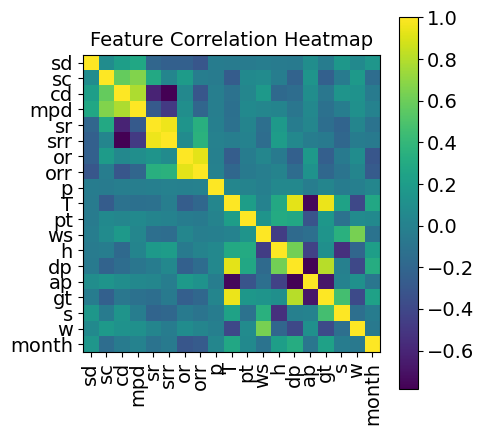

In [ ]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(data_join)

In [ ]:
# 변수 간 상관성 확인
data_join.corr()[data_join.corr()>0.7]

,sd,sc,cd,mpd,sr,srr,or,orr,p,T,pt,ws,h,dp,ap,gt,s,w,month
sd,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cd,NaN,NaN,1.000000,0.780866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mpd,NaN,NaN,0.780866,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sr,NaN,NaN,NaN,NaN,1.000000,0.951477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
srr,NaN,NaN,NaN,NaN,0.951477,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
or,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.927424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
orr,NaN,NaN,NaN,NaN,NaN,NaN,0.927424,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.928073,NaN,0.947799,NaN,NaN,NaN


In [ ]:
# 상관성 높은 변수들 제거
data_join.drop(['mpd', 'srr', 'gt', 'sd','orr', 'dp','p'], axis = 1, inplace = True)
test_join.drop(['mpd', 'srr', 'gt', 'sd','orr', 'dp','p'], axis = 1, inplace = True)

### 5. 모델링

In [ ]:
# 파라미터 지정
split_fraction = 0.7
train_split = int(split_fraction * int(data_join.shape[0]))
past = 1440  # 5일 데이터 이용하여 미래예측
future = 1   # 뒤의 1시점 예측
learning_rate = 0.01
batch_size = 128
epochs = 30

In [ ]:
# 정규화 함수
def normalize(data,m,s) :
  data_mean = m
  data_std = s
  return (data-data_mean) / data_std

In [ ]:
# 정규화
m = data_join[:train_split].mean(axis=0)
s = data_join[:train_split].std(axis=0)

features = normalize(data_join, m,s)
features = pd.DataFrame(features)
test_data = normalize(test_join, m, s)

In [ ]:
# 데이터 분할
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

#### training dataset

In [ ]:
# window_size 설정 (6시간 예측해야 하므로 12*6 = 72로 설정)
window_size = 72

In [ ]:
train_data.columns = range(12)
val_data.columns = range(12)

In [ ]:
# train_x, train_y 생성
start = past + future
end = start + train_split
train_X = train_data[[i for i in range(12)]].values
train_y = data_join.iloc[start:end][['cd']]

In [ ]:
# 이후 72시점의 cd를 y로 지정 (즉 72열을 가짐)
y_train = []
for i in range(len(train_y) - window_size):
    _Y = train_y[i : i + window_size]
    y_train.append(_Y)
Y = np.array(y_train).reshape(len(train_y)-72,72)
Y = pd.DataFrame(Y)

In [ ]:
# valid x, valid_y 만들기

x_end = len(val_data) - past - future
label_start = train_split + past + future
val_X = val_data.iloc[:x_end][[i for i in range(12)]].values
val_y = data_join.iloc[label_start:][['cd']]


y_valid = []
for i in range(len(val_y) - window_size):
    _Y = val_y[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    y_valid.append(_Y)

Y_val = np.array(y_valid).reshape(len(val_y)-72,72)
Y_val = pd.DataFrame(Y_val)

In [ ]:
# 2023.03.13 - 2023.03.19까지의 데이터(2016개)를 x 데이터로 사용
x = test_data.iloc[:2016]
x.columns = range(12)

In [ ]:
test_X = x.iloc[:][[i for i in range(12)]].values
test_y = test_join[:][['cd']]

In [ ]:
# 이후 72시점의 cd를 y로 지정 (즉 72열을 가짐)
# 2023.03.13 - 2023.03.19의 5분단위 6시간 후까지의 'cd' 실제값을 test_Y로 지정
y_test = []
for i in range(len(test_y) - window_size):
    _Y = test_y[i : i + window_size]
    y_test.append(_Y)
Y_test = np.array(y_test).reshape(len(test_y)-72,72)
test_Y = pd.DataFrame(Y_test)

#### (1) 랜덤포레스트

In [ ]:
### RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 25)
rf.fit(train_X[:len(train_X)-72], Y)

RandomForestRegressor(n_estimators=25)

In [ ]:
pred_rf = rf.predict(val_X[:len(val_X)-72])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(Y_val, pred_rf) # 0.0941

0.09412051121864337

In [ ]:
pred_test = rf.predict(test_X)

In [ ]:
# 분석대상기간(23.03.13-23.03.19)의 mape 결과
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_Y, pred_test) #0.1007

0.10073088108448214

#### (2) LightGBM

향후 6시간의 전력수요량을 예측해야 하는데, LightGBM 5분(1시점) 뒤의 전력수요량만 예측하기 때문에, for문을 이용하여 5분 뒤를 예측하는 모델부터, 6시간 뒤를 예측하는 모델까지 총 72개의 모델을 학습했다.

In [ ]:
import lightgbm as ltb
lgb = ltb.LGBMRegressor(learning_rate = 0.04, max_depth = 10, metric = 'mape')

In [ ]:
pred = []
for i in range(72):
  lgb.fit(train_X[:len(train_X)-72], Y[[i]])
  pred.append(lgb.predict(val_X[:len(val_X)-72]))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2818
[LightGBM] [Info] Number of data points in the train set: 234868, number of used features: 12
[LightGBM] [Info] Start training from score 63654.030921
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly 

In [ ]:
Y_lgb = np.array(pred).reshape(72,-1)

In [ ]:
pred_lgb = pd.DataFrame(np.transpose(Y_lgb))

In [ ]:
mean_absolute_percentage_error(Y_val, pred_lgb) # 0.0865

0.08657261242555095

#### (3) Bagging

In [ ]:
### bagging regressor
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(n_estimators = 20,
                       max_samples = 0.5)
bag.fit(train_X[:len(train_X)-72], Y)

BaggingRegressor(max_samples=0.5, n_estimators=20)

In [ ]:
pred_bag = bag.predict(val_X[:len(val_X)-72])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(Y_val, pred_bag) # 0.0932

0.09323315370297049

In [ ]:
pred_test = bag.predict(test_X)

In [ ]:
# 분석대상기간(23.03.13-23.03.19)의 mape 결과
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_Y, pred_test) #0.09772

0.09772466045635574

### 6. 제출

세가지 모델 중 lightgbm 모델의 성능이 가장 좋았기 때문에 lightgbm 모델을 이용해 분석대상기간의 mape를 구하였다.

In [ ]:
pred = []
for i in range(72):
  lgb.fit(train_X[:len(train_X)-72], Y[[i]])
  pred.append(lgb.predict(test_X))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2818
[LightGBM] [Info] Number of data points in the train set: 234868, number of used features: 12
[LightGBM] [Info] Start training from score 63654.030921
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly 

In [ ]:
Y_lgb = np.array(pred).reshape(72,-1)
pred_test = pd.DataFrame(np.transpose(Y_lgb))

In [ ]:
# 분석대상기간(23.03.13-23.03.19)의 mape 결과
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_Y, pred_test) # 0.0916

0.09169184958402099

In [ ]:
pred_test.to_csv('/content/drive/MyDrive/2023 공공데이터 활용 공모전/predict.csv', index=False)

분석 대상 기간(23.03.13-23.03.19)의 mape 결과는 0.0916이다.